#  Dans ce projet on va faire l'anlyse des joueurs de basket NBA La saison 2016-2017
**Donc il est necessaire de connaitre l'abréviation de chaque terme**
* GM, GP; GS: games played; games started
* PTS: points
* FGM, FGA, FG%: field goals made, attempted and percentage
* FTM, FTA, FT%: free throws made, attempted and percentage
*  3FGM, 3FGA, 3FG%: three-point field goals made, attempted and percentage
* R0EB, OREB, DREB: rebounds, offensive rebounds, defensive rebounds
* AST: assists
* STL: steals
* BLK: blocks
* TO: turnovers
* PF: personal fouls
* MIN: minutes
* PIE Player Impact Estimate
* PG: point guard 
* SG : shooting guard
* SF : small forward 
* C : centre
* PF : power forward

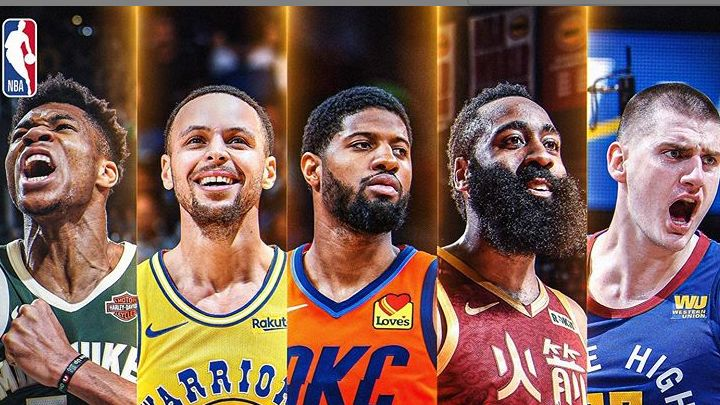]
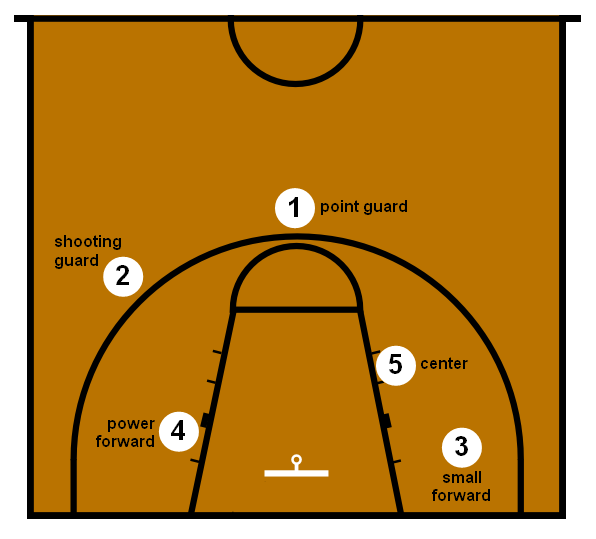

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
dataset = pd.read_csv("../input/social-power-nba/nba_2017_nba_players_with_salary.csv")
dataset1 = pd.read_csv("../input/nba-players-data/all_seasons.csv")

In [ ]:
dataset.head()

****On va choisir la saison 2016-2017 a partir de plusieurs saisons****

In [ ]:
dataset1 = dataset1.loc[(dataset1['season'] == "2016-17")] 

In [ ]:
dataset1.head()

In [ ]:
players_height_weight = dataset1[['player_name','player_height' ,'player_weight']].copy()

In [ ]:
players_height_weight

In [ ]:
players_height_weight.rename(columns={'player_name': 'PLAYER'}, inplace=True)
players_height_weight.rename(columns={'player_height': 'HEIGHT'}, inplace=True)
players_height_weight.rename(columns={'player_weight': 'WEIGHT'}, inplace=True)

In [ ]:
players_height_weight

In [ ]:
df = dataset.merge(players_height_weight, how="inner", on="PLAYER")

In [ ]:
df

In [ ]:
df.columns

**On va supprimer quelques features no necessaire ou qu'on peut les replacer par d'autres**

In [ ]:
del df['3P%']
del df['2P%']
del df['eFG%']
del df['FT%']
del df['FG%']
del df['ORB']
del df['DRB']
del df['PACE']
del df['AGE']
del df['WEIGHT']

In [ ]:
del df['Unnamed: 0']
del df['Rk']
del df['TEAM']

In [ ]:
df

In [ ]:
position_df = df['POSITION']

**Maintenant on va faire la descreption des donneés**

In [ ]:
df.describe().T

In [ ]:
x = df.iloc[:,2:].values
y = df.iloc[:,0]

In [ ]:
x

In [ ]:
y

In [ ]:
from sklearn import preprocessing

In [ ]:
corr = df.corr()

In [ ]:
corr

In [ ]:
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("NBA Players Correlation Heatmap:  2016-2017 Season ")
sns.heatmap(corr, xticklabels = corr.columns.values , yticklabels = corr.columns.values)

# Correlation de quelques features entre eux 

In [ ]:
figx = px.scatter_matrix(df, dimensions=["SALARY_MILLIONS", "WINS_RPM", "PIE", "HEIGHT" ,"BLK" , "POINTS","TRB"], color="POSITION")

In [ ]:
figx

In [ ]:
sns.lmplot(x="SALARY_MILLIONS", y="WINS_RPM", data=df)

In [ ]:
sns.lmplot(x="SALARY_MILLIONS", y="PIE", data=df)

In [ ]:
sns.lmplot(x="HEIGHT", y="TRB", data=df)

In [ ]:
sns.lmplot(x="HEIGHT", y="BLK", data=df)

**on fait maintenant la centrage et la reduciton des   variables**

In [ ]:
datasetcr = preprocessing.scale(x)

In [ ]:
datasetcr

**determiner les variables et les valures propres de la matricer de coorelation**

In [ ]:
eig_vals , eig_vecs = np.linalg.eig(corr)

In [ ]:
eig_vals

In [ ]:
eig_vecs

**ici j'ai trouvé qu'il suffit de choisir 4 principal composontes**

In [ ]:
from sklearn.decomposition import PCA


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2' ,'principal component 3' ,'principal component 4' ])

In [ ]:
pca.explained_variance_ratio_

In [ ]:
print(pca.explained_variance_ratio_ * 100)

In [ ]:
principalDf


In [ ]:
finalDf = pd.concat([principalDf, y ,position_df ], axis = 1)

In [ ]:
finalDf

In [ ]:
pca.fit(x)

In [ ]:
pcs = pca.components_


In [ ]:
pcs

In [ ]:
columns=dataset.columns.values

In [ ]:
columns

In [ ]:
x

In [ ]:
finalDf

In [ ]:
pc1 = finalDf.iloc[:,0]

In [ ]:
pc1

In [ ]:
pc2 = finalDf.iloc[:,1]

In [ ]:
pc2

In [ ]:
pc3 = finalDf.iloc[:,2]

In [ ]:
pc3

In [ ]:
fig = px.scatter(finalDf, x="principal component 1" , y="principal component 2"  ,hover_name ="PLAYER",  size_max=100 , color="POSITION"   )

In [ ]:
fig

In [ ]:
fig1 = px.scatter(finalDf, x="principal component 1" , y="principal component 3",hover_name ="PLAYER",  size_max=100 , color="POSITION"   )

In [ ]:
fig1

**Observation : les joueurs sont placés d'une facon particulers :**
* Les PG-SG : Au dessus de l'axe des abscies
* LES C-PF : Au dessous de l'axe des abscies 

In [ ]:
fig2 = px.scatter(finalDf, x="principal component 2" , y="principal component 3",hover_name="PLAYER", size_max=100 , color="POSITION"  )

In [ ]:
fig2

In [ ]:
fig3 = px.scatter(finalDf, x="principal component 1" , y="principal component 4",hover_name="PLAYER", size_max=100 , color="POSITION"  )

In [ ]:
fig3

In [ ]:
fig4 = px.scatter(finalDf, x="principal component 3" , y="principal component 4",hover_name="PLAYER", size_max=100 , color="POSITION"  )

In [ ]:
fig4

# On constaste qu'il ya des joueurs particulés donc on va conculre a partir d'eux les axes compsontes principales

In [ ]:
df.loc[(df['PLAYER'] == "Rudy Gay")] 

In [ ]:
df.loc[(df['PLAYER'] == "JaVale McGee")] 

In [ ]:
print(df.loc[(df['PLAYER'] == "Isaiah Thomas")] )

In [ ]:
print(df.loc[(df['PLAYER'] == "Kristaps Porzingis")] )